In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14

# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
sample_freq = (62.5) * u.MHz # 62.5 MHz
dt = (1 / sample_freq).to(u.ns) # 16 ns

N_samples = 16000

sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [4]:
plus_data = np.loadtxt('x_p_data_5_1.txt', dtype = np.int16) * scaling_factor
minus_data = np.loadtxt('x_m_data_5_1.txt', dtype = np.int16) * scaling_factor

plus_fft, minus_fft = np.fft.fft(plus_data) / sampling_time , np.fft.fft(minus_data) / sampling_time

plus_power, minus_power = np.abs(plus_fft)**2 , np.abs(minus_fft)**2



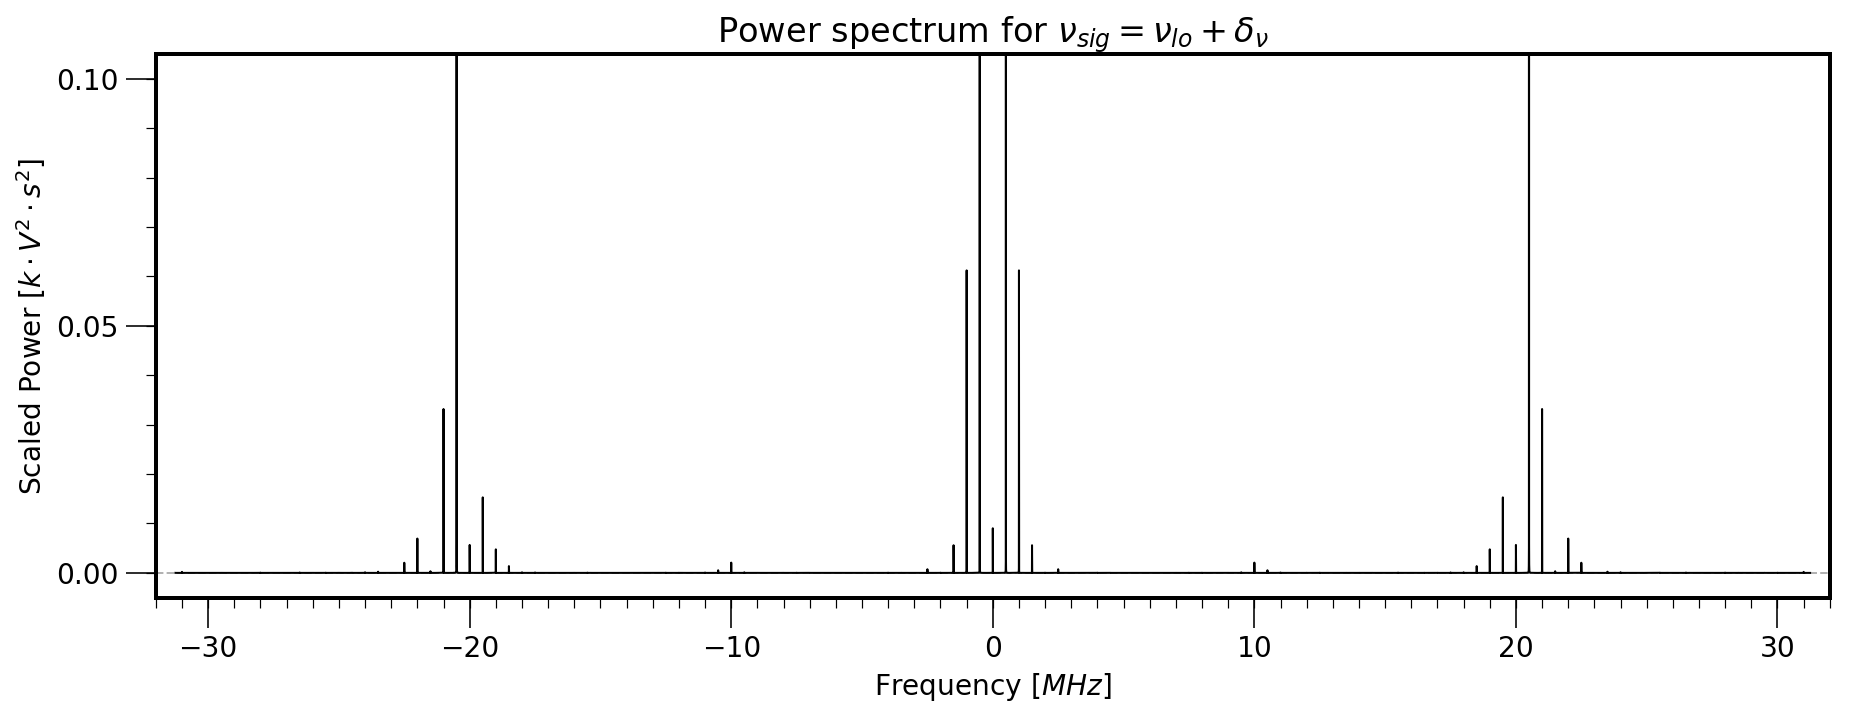

In [29]:
fig, ax = plt.subplots( figsize = (15,5))

PLOT_SCALE = 1e12 / .7

ax.plot(np.fft.fftshift(freqs),
        np.fft.fftshift(plus_power) / PLOT_SCALE,
        color = 'black',
        linewidth = 1)

ax.set_title(r'Power spectrum for $\nu_{sig} = \nu_{lo} + \delta_\nu$')
    
ax.set_xlabel(r'Frequency [$MHz$]')
ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')

ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(.01))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', length = 15)
ax.tick_params(which='minor', length = 5)
ax.axhline(0, color = 'black', linewidth = 1, alpha = 0.3, ls = '--')
ax.set_xlim(-32, 32)
ax.set_ylim(-0.005, .105)
fig.savefig('zoomed_power_plus_5_2.pdf')
plt.show()

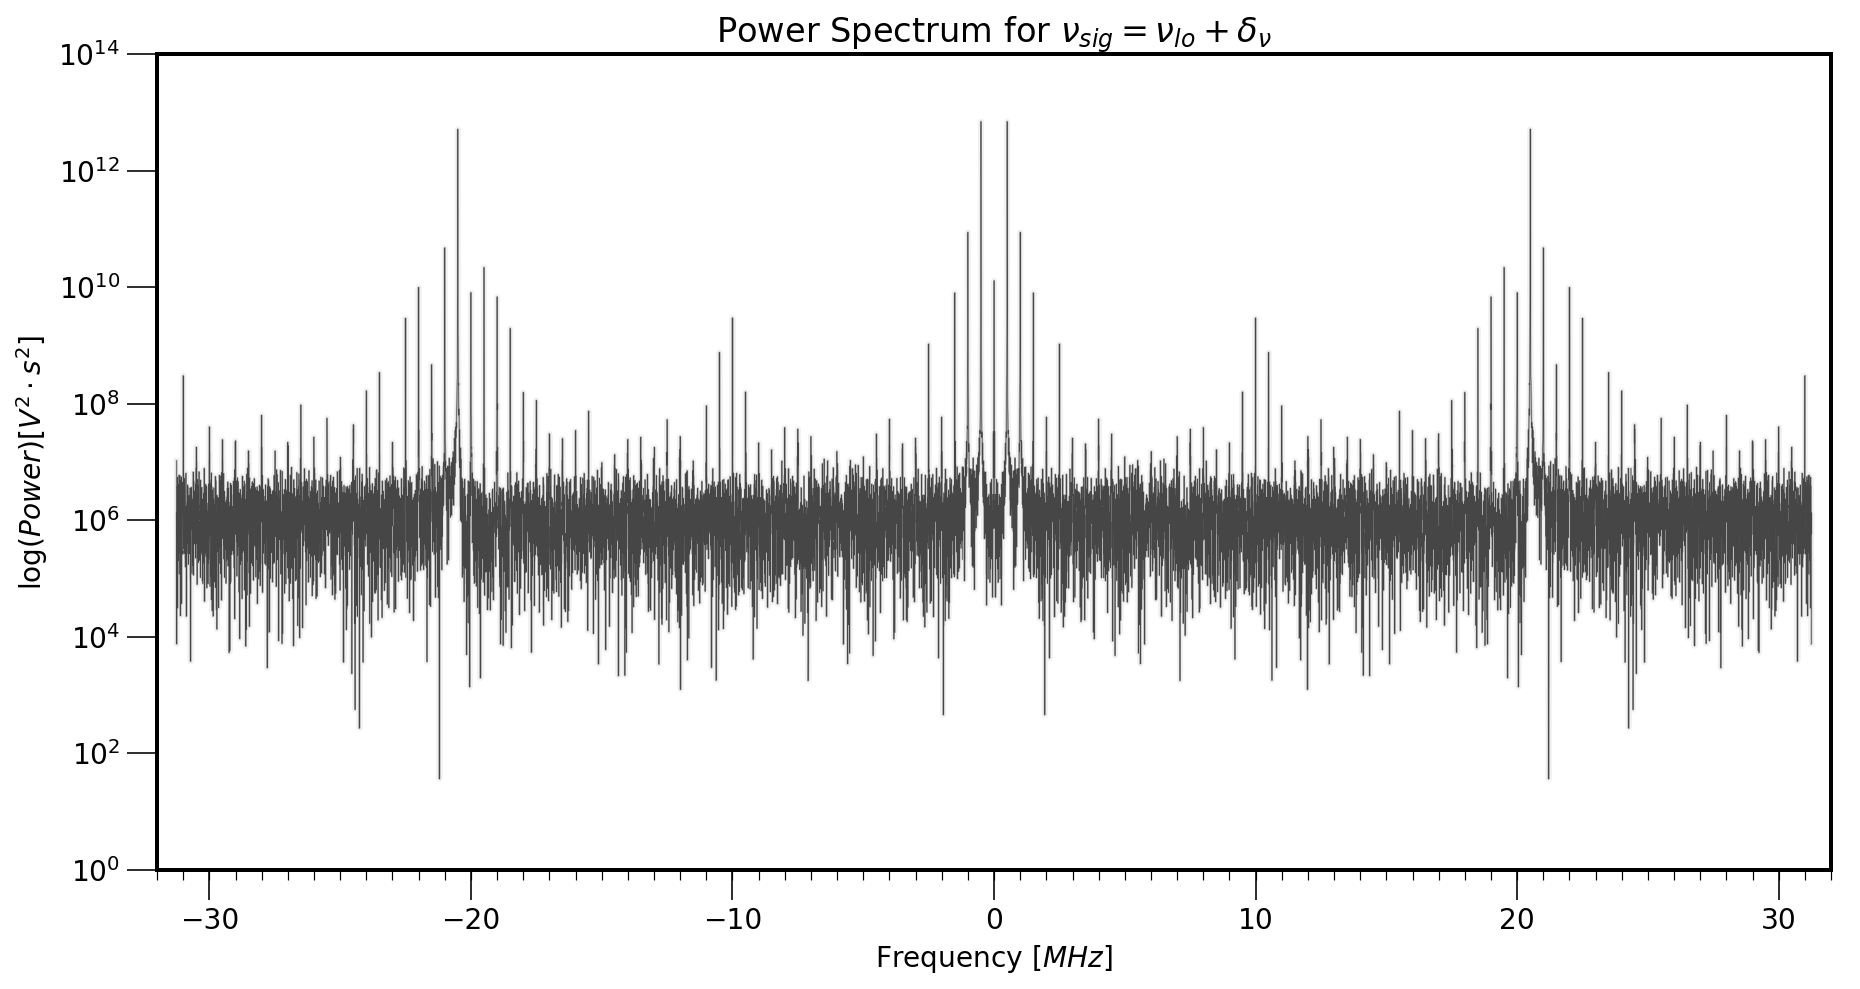

In [32]:
fig, ax = plt.subplots( figsize = (15,7.5))

ax.plot(np.fft.fftshift(freqs),
        np.fft.fftshift(plus_power),
        color = 'black',
        linewidth = 0.3,
        alpha = 1)

ax.plot(np.fft.fftshift(freqs),
        np.fft.fftshift(plus_power),
        color = 'gray',
        linewidth = 1,
        alpha = 0.5)

ax.plot(np.fft.fftshift(freqs),
        np.fft.fftshift(plus_power),
        color = 'gray',
        linewidth = 3,
        alpha = 0.1)

ax.set_title(r'Power Spectrum for $\nu_{sig} = \nu_{lo} + \delta_\nu$')
    
ax.set_xlabel(r'Frequency $[MHz]$')
ax.set_ylabel(r'$ \log{(Power)} [ V^2 \cdot s^2]$')

ax.set_xlim(-35, 35)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(which='major', length = 15)
ax.tick_params(which='minor', length = 5)
ax.axhline(0, color = 'black', linewidth = 2)
ax.set_ylim(1,1e14)
ax.set_xlim(-32, 32)
ax.semilogy()
plt.show()
fig.savefig('logged_power_plus_5_2.pdf')